In [1]:
import matplotlib
matplotlib.use('nbagg')
print(matplotlib.get_backend())

nbAgg


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Utilities = pd.read_excel('../MLWithPython/datasets/Utilities.xls')

In [5]:
corr_matrix = Utilities.corr()

<IPython.core.display.Javascript object>


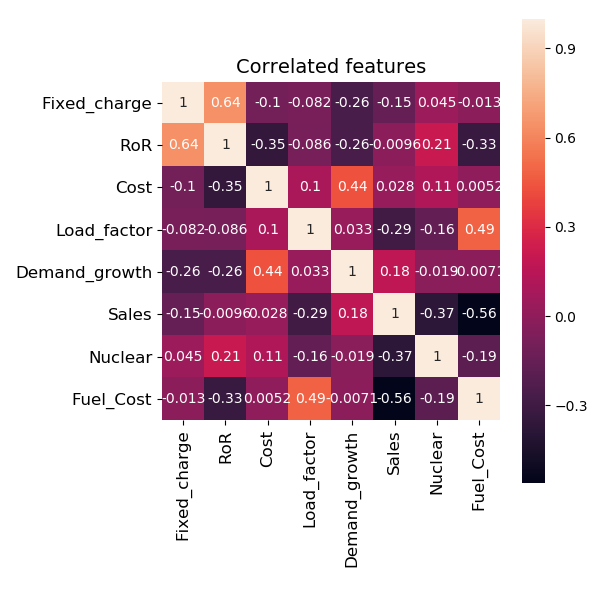

In [6]:
f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(data=corr_matrix, annot=True, square=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.title('Correlated features',fontsize=14)
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


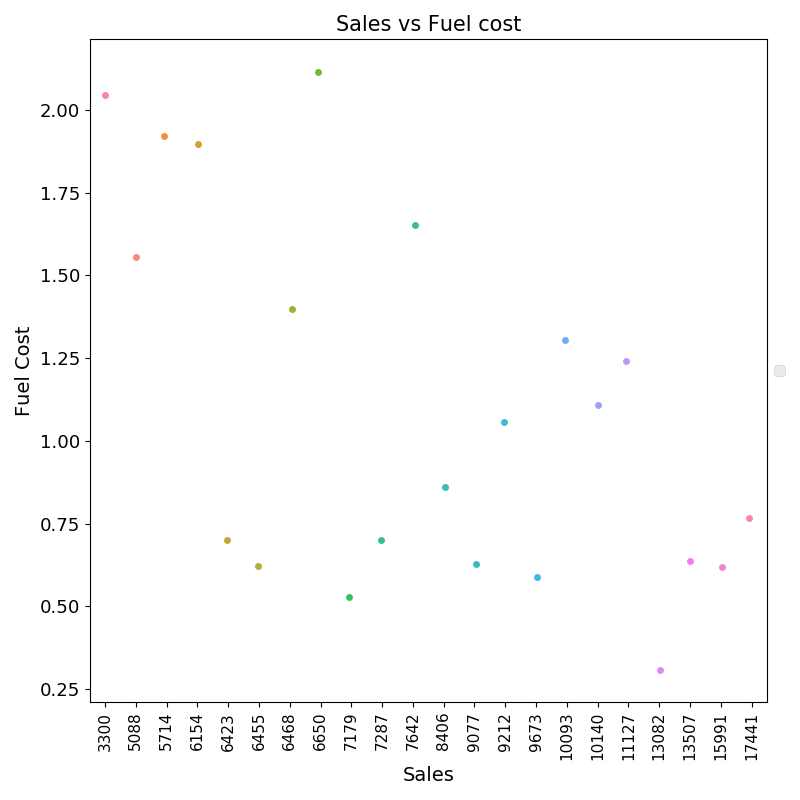

In [7]:
fig,ax=plt.subplots(figsize=(8,8))
sns.stripplot(x='Sales' ,y='Fuel_Cost', data=Utilities,jitter=True)

plt.style.use('ggplot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Sales',fontsize=14)
plt.ylabel('Fuel Cost',fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=90,fontsize=11)
plt.title('Sales vs Fuel cost',fontsize=15)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
scaler = StandardScaler()

In [11]:
scaled_df = scaler.fit(Utilities[Utilities.columns[1:]])

In [14]:
scaled_df.mean_

array([1.11409091e+00, 1.07363636e+01, 1.68181818e+02, 5.69772727e+01,
       3.24090909e+00, 8.91404545e+03, 1.20000000e+01, 1.10272727e+00])

In [17]:
scaled_df = scaler.transform(Utilities[Utilities.columns[1:]])

In [18]:
scaled_df

array([[-0.30005669, -0.70075032, -0.42693798, -0.59131032, -0.53861103,
         0.04698311, -0.73144654, -0.87376468],
       [-1.24309198, -0.19902968,  0.84032237,  0.21170369, -0.34166738,
        -1.10312676,  0.81068658,  0.83243571],
       [ 1.7524319 ,  2.12712967, -1.37117119, -0.91251592,  0.05221991,
         0.08590636, -0.73144654, -0.08232329],
       [-0.52194734,  0.21146903, -0.00451786, -0.2242182 , -0.96532226,
        -0.71821909,  1.35927148, -0.74124426],
       [ 2.08526789, -0.88319419,  0.59183995, -1.32549456, -0.73555468,
        -1.61864354,  0.21943396,  1.73247023],
       [ 1.14223259,  1.26052129, -1.42086767,  0.6935121 , -1.78592078,
         0.63803982,  0.64001572,  0.25449944],
       [ 0.58750595,  0.66757871,  0.16941983,  2.43719967, -0.34166738,
        -0.36675659, -0.73144654,  1.01097017],
       [-0.07816603, -0.70075032,  1.90879679,  0.00521438,  0.01939597,
         1.20170611, -0.73144654, -1.46090376],
       [ 1.25317792,  1.03246645

In [19]:
kmeans = KMeans(n_clusters=3)

In [20]:
kmeans.fit(Utilities[Utilities.columns[1:]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
clusters = kmeans.predict(Utilities[Utilities.columns[1:]])

In [24]:
Utilities['Cluster'] = clusters

In [27]:
Utilities.groupby('Cluster').mean()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Cluster,,,,,,,,
0,1.089091,10.263636,178.454545,58.763636,3.127273,6214.545455,19.536364,1.376000
1,1.042500,9.575000,193.500000,54.625000,4.225000,15005.250000,0.000000,0.583250
2,1.194286,12.142857,137.571429,55.514286,2.857143,9675.428571,7.014286,0.970143


<IPython.core.display.Javascript object>


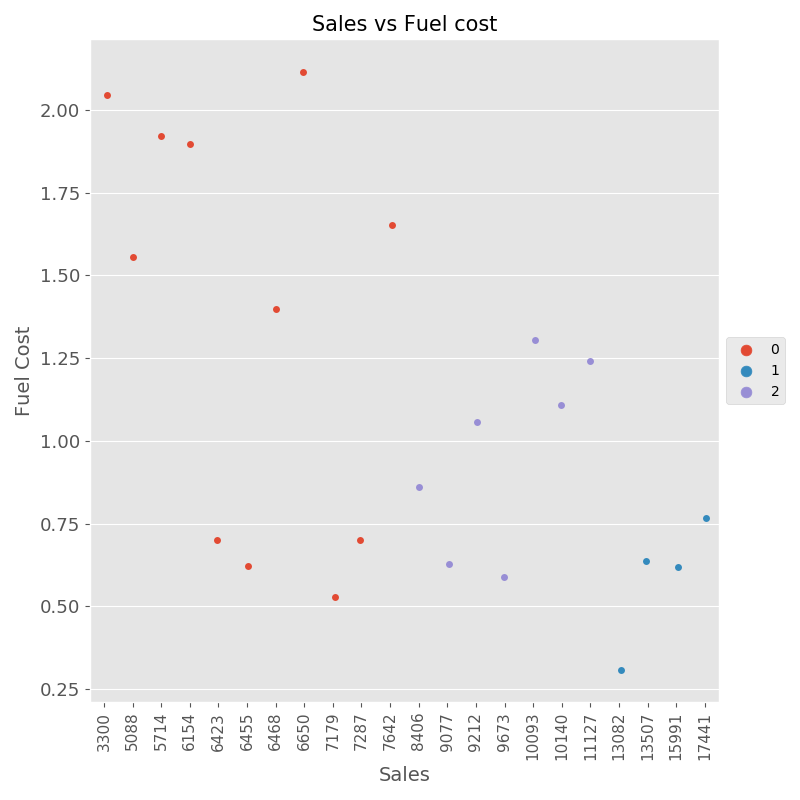

In [28]:
fig,ax=plt.subplots(figsize=(8,8))
sns.stripplot(x='Sales' ,y='Fuel_Cost', hue='Cluster', data=Utilities,jitter=True)

plt.style.use('ggplot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Sales',fontsize=14)
plt.ylabel('Fuel Cost',fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=90,fontsize=11)
plt.title('Sales vs Fuel cost',fontsize=15)
plt.tight_layout()
plt.show()

In [31]:
Cereals = pd.read_excel('../MLWithPython/datasets/Cereals.xls', sheet_name='cereal-updated')

In [32]:
Cereals

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating,Unnamed: 12,Unnamed: 13
0,100%_Bran,70,4,1,130,10.0,5.0,6,280.0,25,3,68.402973,NaN,1. 1st column : Name of cereal
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8,135.0,0,3,33.983679,NaN,2. calories: calories per serving
2,All-Bran,70,4,1,260,9.0,7.0,5,320.0,25,3,59.425505,NaN,3. protein: grams of protein
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0,330.0,25,3,93.704912,NaN,4. fat: grams of fat
4,Almond_Delight,110,2,2,200,1.0,14.0,8,NaN,25,3,34.384843,NaN,5. sodium: milligrams of sodium
5,Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10,70.0,25,1,29.509541,NaN,6. fiber: grams of dietary fiber
6,Apple_Jacks,110,2,0,125,1.0,11.0,14,30.0,25,2,33.174094,NaN,7. carbo: grams of complex carbohydrates
7,Basic_4,130,3,2,210,2.0,18.0,8,100.0,25,3,37.038562,NaN,8. sugars: grams of sugars
8,Bran_Chex,90,2,1,200,4.0,15.0,6,125.0,25,1,49.120253,NaN,9. potass: milligrams of potassium
9,Bran_Flakes,90,3,0,210,5.0,13.0,5,190.0,25,3,53.313813,NaN,"10. vitamins: vitamins and minerals - 0, 25, o..."


In [35]:
Cereals2 = Cereals[Cereals.columns[2:12]]

In [36]:
Cereals2

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,4,1,130,10.0,5.0,6,280.0,25,3,68.402973
1,3,5,15,2.0,8.0,8,135.0,0,3,33.983679
2,4,1,260,9.0,7.0,5,320.0,25,3,59.425505
3,4,0,140,14.0,8.0,0,330.0,25,3,93.704912
4,2,2,200,1.0,14.0,8,NaN,25,3,34.384843
5,2,2,180,1.5,10.5,10,70.0,25,1,29.509541
6,2,0,125,1.0,11.0,14,30.0,25,2,33.174094
7,3,2,210,2.0,18.0,8,100.0,25,3,37.038562
8,2,1,200,4.0,15.0,6,125.0,25,1,49.120253
9,3,0,210,5.0,13.0,5,190.0,25,3,53.313813
